In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
cars = pd.read_excel('cars.xlsx', sheet_name='Update')
print(cars.head(5))

   № п/п         Марка Модель Объем  Год выпуска  Стоимость долларов США КГД  \
0      1         ACURA    MDX  3500         2021                     25000.0   
1      2         ACURA    MDX  2000         2020                     16000.0   
2      3  ASTON MARTIN   DB11  4000         2021                    138971.0   
3      4  ASTON MARTIN   DB11  4000         2022                    169000.0   
4      5  ASTON MARTIN    DBX  4000         2021                    155205.0   

   Код товара  Адвалорная  Специфическая              Источник  
0  8703241098       0.125            0.0  55302/220422/0049742  
1  8703231981       0.150            0.0  50709/090622/0003630  
2  8703241098       0.125            0.0             mobile.de  
3  8703241098       0.125            0.0             mobile.de  
4  8703241098       0.125            0.0             mobile.de  


Clean the data

In [2]:
cars.dropna(inplace=True)

Numbers of rows and columns

In [3]:
row_count = cars.shape[0]
col_count = cars.shape[1]
print(f'Number of rows: {row_count}')
print(f'Number of columns: {col_count}')

Number of rows: 1190
Number of columns: 10


the header (column names) of a Pandas dataframe using the columns attribute

In [4]:
header = cars.columns
print(f'Header: {header}')

Header: Index(['№ п/п', 'Марка', 'Модель', 'Объем', 'Год выпуска',
       'Стоимость долларов США КГД', 'Код товара', 'Адвалорная',
       'Специфическая', 'Источник'],
      dtype='object')


Count the number of occurrences of a specific value(Марка) in a column

In [5]:
value_counts = cars['Марка'].value_counts()
print(f"Count of value: {value_counts}")

Count of value: MERCEDES-BENZ    165
KIA              137
TOYOTA           135
HYUNDAI           82
LEXUS             65
BMW               64
AUDI              55
CHEVROLET         44
VOLKSWAGEN        40
MITSUBISHI        32
FORD              31
PORSCHE           30
SUBARU            26
NISSAN            23
HONDA             22
GENESIS           19
VOLVO             19
LAND ROVER        18
JEEP              15
ROLLS-ROYCE       13
DODGE             12
MAZDA             12
INFINITI          12
SUZUKI            11
CADILLAC          10
MINI              10
TESLA              9
FERRARI            8
BENTLEY            8
LAMBORGHINI        8
GMS                7
SKODA              7
ASTON MARTIN       6
JAGUAR             5
FIAT               4
SAMSUNG            4
SSANGYONG          4
MASERATI           3
LINCOLN            3
PEUGEOT            3
RENAULT            3
ACURA              2
CHRYSLER           1
CITROEN            1
MORGAN             1
ISUZU              1
Name: Марка, dtype

Create a pie chart of the value counts in a Pandas dataframe using the value_counts method and the matplotlib library

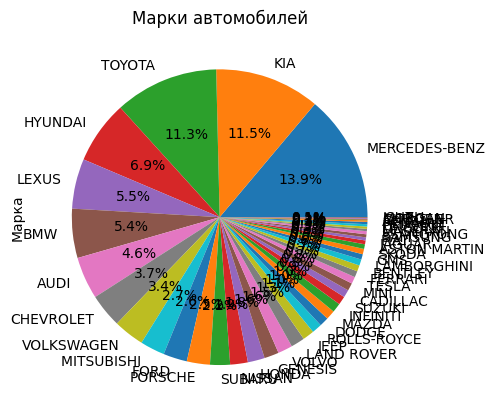

In [6]:
value_counts = cars['Марка'].value_counts()
value_counts.plot.pie(autopct='%1.1f%%')
plt.title("Марки автомобилей")
plt.show()

In [7]:
pivot_table = cars.pivot_table(values="Стоимость долларов США КГД", index="Марка", columns="Год выпуска", aggfunc='mean')
print(pivot_table)

Год выпуска      2013     2015          2016          2017          2018  \
Марка                                                                      
ACURA             NaN      NaN           NaN           NaN           NaN   
ASTON MARTIN      NaN      NaN           NaN           NaN           NaN   
AUDI              NaN      NaN  12000.000000  13380.000000  14500.000000   
BENTLEY           NaN      NaN           NaN           NaN           NaN   
BMW               NaN      NaN           NaN  15400.000000  18500.000000   
CADILLAC          NaN      NaN           NaN           NaN           NaN   
CHEVROLET         NaN      NaN   4900.000000   5800.000000   8450.000000   
CHRYSLER          NaN      NaN           NaN           NaN           NaN   
CITROEN           NaN      NaN           NaN           NaN           NaN   
DODGE             NaN      NaN           NaN   6500.000000   9950.000000   
FERRARI           NaN      NaN           NaN           NaN           NaN   
FIAT        

In [ ]:
# grouped = cars.groupby(['Марка', 'Модель', 'Объем', 'Год выпуска'])
# for name, group in grouped:
#     # Print the name of the group
#     print("Group:", name)
#     # Print the group data
#     print(group)
    

Rename the header of a Pandas dataframe

In [10]:
cars.rename(columns={'№ п/п': 'id', 'Марка': 'Brand', 'Модель': 'Model', 'Объем': 'Volume', 'Год выпуска': 'Year of issue',
       'Стоимость долларов США КГД': 'Value', 'Код товара': 'HS code', 'Адвалорная': 'ad valorem',
       'Специфическая': 'Specific', 'Источник': 'Source'}, inplace=True)

In [11]:
header = cars.columns
print(f'Header: {header}')

Header: Index(['id', 'Brand', 'Model', 'Volume', 'Year of issue', 'Value', 'HS code',
       'ad valorem', 'Specific', 'Source'],
      dtype='object')


Remove spaces at the beginning and end of a string in Pandas

In [13]:
cars['Brand'] = cars['Brand'].str.strip()
cars['Model'] = cars['Model'].str.strip()

A chart to show the most expensive, cheapest, and average car prices in a Pandas dataframe

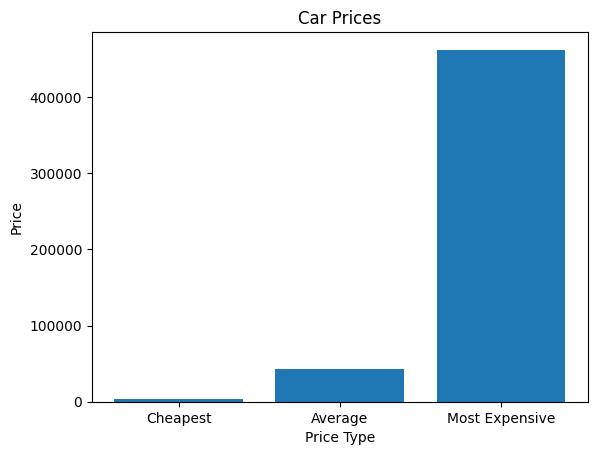

In [14]:
max_price = cars['Value'].max()
min_price = cars['Value'].min()
avg_price = cars['Value'].mean()
prices = [min_price, avg_price, max_price]
labels = ['Cheapest', 'Average', 'Most Expensive']

plt.bar(labels, prices)
plt.xlabel('Price Type')
plt.ylabel('Price')
plt.title('Car Prices')

plt.show()

Data Exploration

In [15]:
print(cars.describe())
print(cars['Brand'].value_counts())

                id  Year of issue          Value       HS code   ad valorem  \
count  1190.000000    1190.000000    1190.000000  1.190000e+03  1190.000000   
mean    595.500000    2020.570588   43581.069210  8.703269e+09     0.151176   
std     343.667717       1.515707   55275.029689  1.129996e+05     0.028795   
min       1.000000    2013.000000    3500.000000  8.703211e+09     0.000000   
25%     298.250000    2020.000000   12712.500000  8.703232e+09     0.125000   
50%     595.500000    2021.000000   22697.000000  8.703239e+09     0.150000   
75%     892.750000    2022.000000   51075.000000  8.703241e+09     0.150000   
max    1190.000000    2023.000000  462432.000000  8.703800e+09     0.200000   

          Specific  
count  1190.000000  
mean      0.107765  
std       0.263964  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       3.200000  
MERCEDES-BENZ    165
KIA              137
TOYOTA           135
HYUNDAI           82
LEXUS          

Grouping and Aggregation

In [17]:
grouped_df = cars.groupby('Brand').agg({'Value': 'mean'})
print(grouped_df)

                       Value
Brand                       
ACURA           20500.000000
ASTON MARTIN   150660.333333
AUDI            44523.636364
BENTLEY        185367.750000
BMW             51786.007812
CADILLAC        59498.700000
CHEVROLET       20682.823864
CHRYSLER        16000.000000
CITROEN         15000.000000
DODGE           24100.000000
FERRARI        258888.250000
FIAT            24771.500000
FORD            31541.225806
GENESIS         30720.565395
GMS             57692.714286
HONDA           13731.818182
HYUNDAI         13845.519634
INFINITI        28606.000000
ISUZU           31050.000000
JAGUAR          32850.200000
JEEP            44277.400000
KIA             12143.802920
LAMBORGHINI    257208.000000
LAND ROVER      72058.833333
LEXUS           35128.346154
LINCOLN         20366.666667
MASERATI       122829.000000
MAZDA           14716.666667
MERCEDES-BENZ   78436.472167
MINI            20803.600000
MITSUBISHI      15234.718750
MORGAN         120000.000000
NISSAN        

Visualization

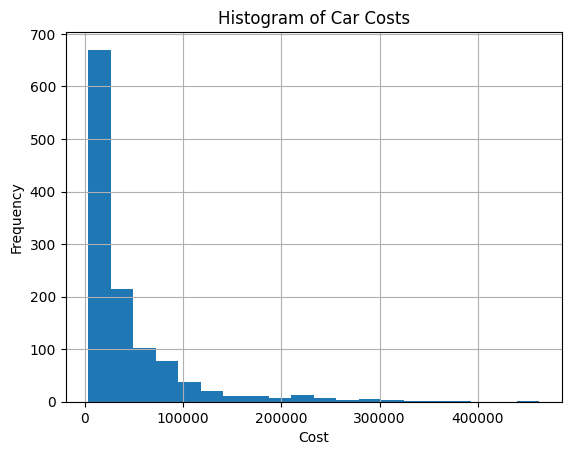

In [18]:
cars.hist(column='Value', bins=20)
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.title('Histogram of Car Costs')
plt.show()

Correlation Analysis

In [19]:
correlation = cars.corr()
print(correlation)

                     id  Year of issue     Value   HS code  ad valorem  \
id             1.000000       0.016986 -0.004559  0.028688    0.034357   
Year of issue  0.016986       1.000000  0.339588  0.074394   -0.553997   
Value         -0.004559       0.339588  1.000000  0.061755   -0.417138   
HS code        0.028688       0.074394  0.061755  1.000000    0.006932   
ad valorem     0.034357      -0.553997 -0.417138  0.006932    1.000000   
Specific      -0.023606      -0.692129 -0.210389 -0.066997    0.453797   

               Specific  
id            -0.023606  
Year of issue -0.692129  
Value         -0.210389  
HS code       -0.066997  
ad valorem     0.453797  
Specific       1.000000  


/var/folders/ch/fbqkhhx50830y8q18s69969m0000gn/T/ipykernel_97280/4197536068.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = cars.corr()


In [20]:
cars.to_excel('cars.xlsx', index=False)